# Assignment 10 _ All in One Super Regression

# Submitted by EMdadul Haque

In [748]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [749]:
df=pd.read_csv('global_laptop_selling_data.csv')

In [750]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [751]:
df=df.drop('laptop_ID', axis=1)

In [752]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [753]:
df_product_price=df.groupby("Company")["Price_euros"].mean()

In [754]:
df_product_price

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64

In [755]:
df_product_price=pd.DataFrame(data=df_product_price)
df_product_price.columns=["Product Avg Price"]
df_product_price.sort_values(by="Product Avg Price",ascending=False,inplace=True)

Text(0.5, 1.0, 'Average Price Per Company')

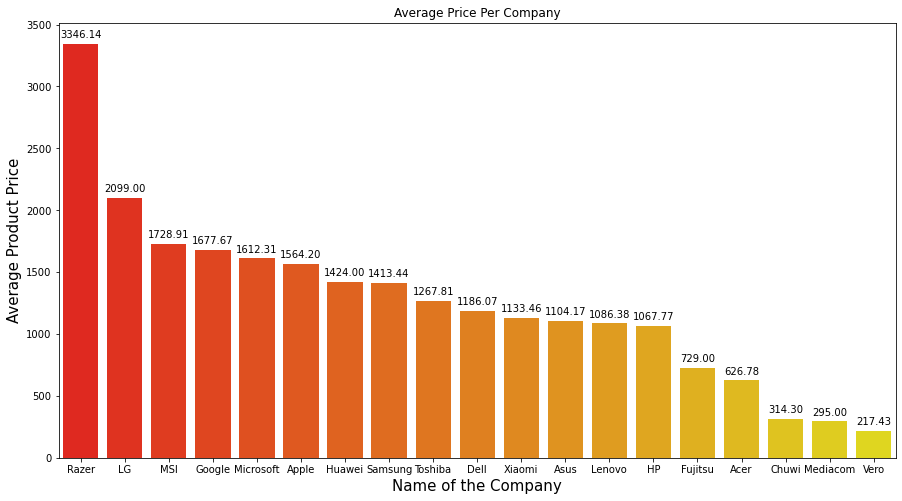

In [756]:
plt.figure(figsize=(15,8))
splot=sns.barplot(data=df_product_price,x=df_product_price.index,y='Product Avg Price', palette='autumn')
for p in splot.patches:
    splot.annotate(format(p.get_height(),'.2f'),
                  (p.get_x()+p.get_width()/2.,p.get_height()),
                  ha='center',va='center',
                  xytext=(0,9),
                  textcoords='offset points')
    
plt.xlabel("Name of the Company",size=15)
plt.ylabel("Average Product Price",size=15)
plt.title('Average Price Per Company')

In [757]:
#label encoding

#company, product, type, os

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Company = le.fit_transform(df['Company'])
df.Product = le.fit_transform(df['Product'])
df.TypeName = le.fit_transform(df['TypeName'])
df.OpSys = le.fit_transform(df['OpSys'])

In [758]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,8,1.37kg,1339.69
1,1,301,4,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,8,1.34kg,898.94
2,7,50,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,4,1.86kg,575.00
3,1,300,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,8,1.83kg,2537.45
4,1,300,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,8,1.37kg,1803.60


In [759]:
#rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)
#df['Title'] = df['Title'].str.replace(r'\sg$|\skg$|\sml$', '')
#df['Ram']=df['Ram'].str.replace(r'\sGB$','',regex=True)
df['Ram']=df['Ram'].str.replace(r'\D','')
df['Weight'] = df['Weight'].map(lambda x: str(x)[:-2])
#df['Weight']=df['Weight'].str.replace(r'\D','')
#df['result'] = df['result'].str.replace(r'\D', '')
#df['Weight']=df['Weight'].str.replace(r'\skg$','',regex=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7524\3256702197.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Ram']=df['Ram'].str.replace(r'\D','')


In [760]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,8,1.37,1339.69
1,1,301,4,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,8,1.34,898.94
2,7,50,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,4,1.86,575.00
3,1,300,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,8,1.83,2537.45
4,1,300,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,8,1.37,1803.60


In [761]:
df.Cpu.unique()
#f['species'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [762]:
df.OpSys.unique()

array([8, 4, 5, 3, 2, 0, 6, 1, 7])

In [763]:
df.Cpu.unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [764]:
df.shape

(1303, 12)

In [765]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,8,1.37,1339.69
1,1,301,4,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,8,1.34,898.94
2,7,50,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,4,1.86,575.00
3,1,300,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,8,1.83,2537.45
4,1,300,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,8,1.37,1803.60


In [766]:
df.ScreenResolution

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [767]:
df.ScreenResolution.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [768]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,8,1.37,1339.69
1,1,301,4,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,8,1.34,898.94
2,7,50,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,4,1.86,575.00
3,1,300,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,8,1.83,2537.45
4,1,300,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,8,1.37,1803.60


In [769]:
df.ScreenResolution = le.fit_transform(df['ScreenResolution'])
df.Cpu = le.fit_transform(df['Cpu'])
df.Gpu = le.fit_transform(df['Gpu'])
df.Memory = le.fit_transform(df['Memory'])

In [770]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,23,65,8,4,56,8,1.37,1339.69
1,1,301,4,13.3,1,63,8,2,50,8,1.34,898.94
2,7,50,3,15.6,8,74,8,16,52,4,1.86,575.00
3,1,300,4,15.4,25,85,16,29,8,8,1.83,2537.45
4,1,300,4,13.3,23,67,8,16,57,8,1.37,1803.60


In [771]:
df.Memory.unique()
df.Memory
df.Memory.unique()

array([ 4,  2, 16, 29, 26, 15, 10, 23,  5, 19, 35, 18, 20, 25, 22, 37,  1,
       31, 12, 21,  6, 34,  8,  7, 32, 33, 36,  9, 11, 24, 13, 28,  3, 14,
       38, 27,  0, 30, 17])

<AxesSubplot:>

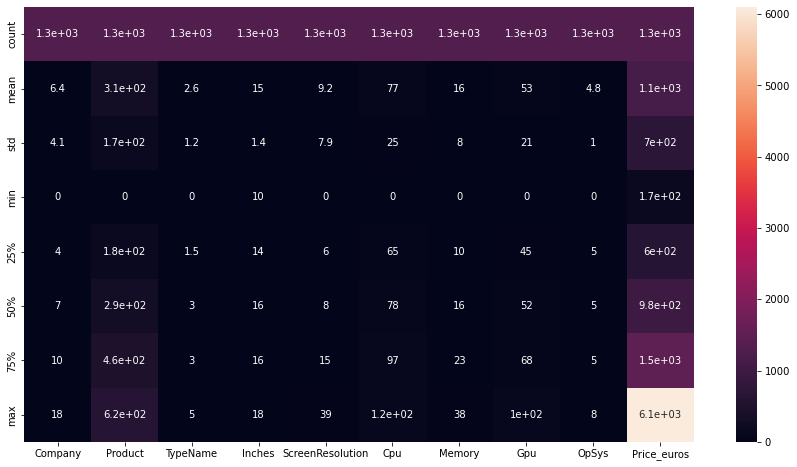

In [772]:
plt.figure(figsize=(15,8))
sns.heatmap(df.describe(),annot=True)

<AxesSubplot:>

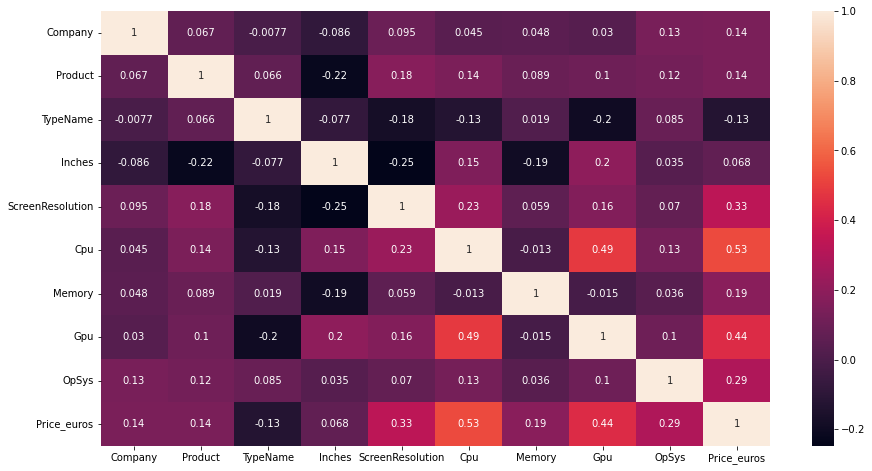

In [773]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [774]:
df.shape

(1303, 12)

In [775]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [776]:
df.Company.value_counts()
# df.Product.value_counts()
# df.TypeName.value_counts()
# df.Cpu.value_counts()
# df.Memory.value_counts()
# df.Gpu.value_counts()
# df.OpSys.value_counts()

4     297
10    297
7     274
2     158
0     103
11     54
16     48
1      21
15      9
14      7
12      7
13      6
18      4
17      4
3       3
6       3
5       3
9       3
8       2
Name: Company, dtype: int64

In [777]:
df.Product.value_counts()
# df.TypeName.value_counts()
# df.Cpu.value_counts()
# df.Memory.value_counts()
# df.Gpu.value_counts()
# df.OpSys.value_counts()

576    30
239    29
50     21
291    19
547    19
       ..
32      1
412     1
53      1
42      1
529     1
Name: Product, Length: 618, dtype: int64

In [778]:
df.TypeName.value_counts()

3    727
1    205
4    196
0    121
5     29
2     25
Name: TypeName, dtype: int64

In [779]:
df.Cpu.value_counts()

74     190
102    146
97     134
106     73
83      72
      ... 
49       1
13       1
55       1
7        1
116      1
Name: Cpu, Length: 118, dtype: int64

In [780]:
df.Memory.value_counts()

16    412
10    223
26    132
29    118
5      94
4      76
18     73
23     38
22     16
35     15
31     14
12     14
20     10
1       9
15      8
7       7
25      6
9       5
2       4
33      3
8       3
28      2
13      2
21      2
6       2
19      2
32      1
34      1
36      1
11      1
24      1
37      1
3       1
14      1
38      1
27      1
0       1
30      1
17      1
Name: Memory, dtype: int64

In [781]:
df.Gpu.value_counts()

52    282
46    185
59     68
71     66
75     48
     ... 
38      1
18      1
24      1
49      1
37      1
Name: Gpu, Length: 106, dtype: int64

In [782]:
df.OpSys.value_counts()

5    1072
4      66
2      62
7      45
1      27
8      13
3       8
6       8
0       2
Name: OpSys, dtype: int64

In [783]:
df.ScreenResolution.value_counts() 

8     507
0     281
15    230
13     53
7      47
2      23
36     16
31     15
12     12
11     11
5      10
6       7
39      7
9       7
19      6
23      6
22      6
37      6
30      5
25      4
28      4
1       4
10      4
20      3
32      3
3       3
38      3
4       3
27      3
26      2
17      2
21      2
24      1
16      1
18      1
14      1
34      1
35      1
33      1
29      1
Name: ScreenResolution, dtype: int64

In [784]:
# using linear Regression
#df.dropna(axis=1,inplace=True)

In [785]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()

In [786]:
#df['']

In [787]:
df['ScreenResolution']

0       23
1        1
2        8
3       25
4       23
        ..
1298    13
1299    19
1300     0
1301     0
1302     0
Name: ScreenResolution, Length: 1303, dtype: int32

In [788]:
df['Product']=m.fit_transform(df[['Product']])

In [789]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,0.486224,4,13.3,23,65,8,4,56,8,1.37,1339.69
1,1,0.487844,4,13.3,1,63,8,2,50,8,1.34,898.94
2,7,0.081037,3,15.6,8,74,8,16,52,4,1.86,575.00
3,1,0.486224,4,15.4,25,85,16,29,8,8,1.83,2537.45
4,1,0.486224,4,13.3,23,67,8,16,57,8,1.37,1803.60


In [790]:
from sklearn.model_selection import train_test_split

In [791]:
x=df[['Company','Product','TypeName','Inches','ScreenResolution','Cpu','Ram','Memory','Gpu','OpSys','Weight']]
y=df[['Price_euros']]

In [515]:
df2=pd.read_csv('global_laptop_selling_data.csv')

# Do some Vizualization

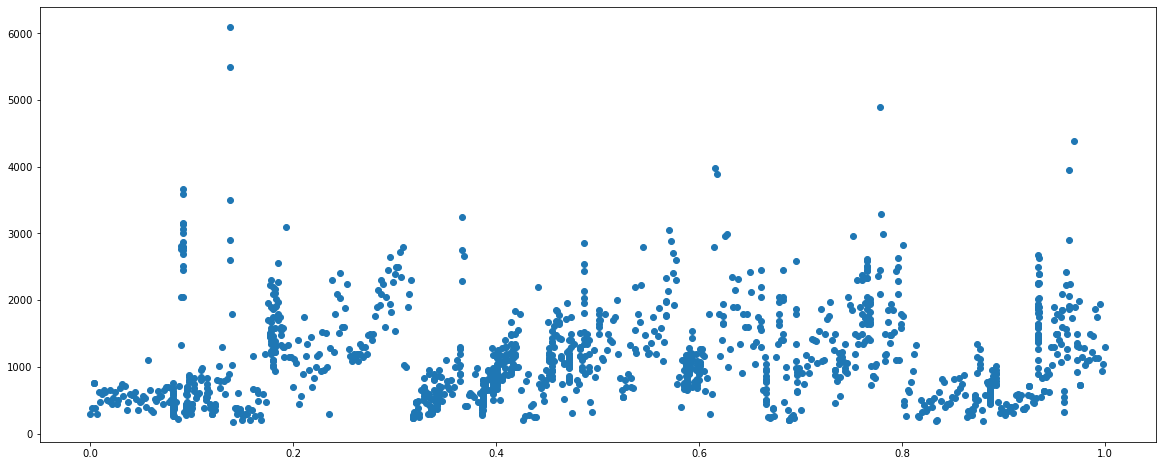

In [46]:
plt.figure(figsize=(20,8))
plt.scatter(df['Product'],df['Price_euros'])

In [792]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.70,random_state=42)

In [793]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [794]:
m=reg.coef_

In [795]:
xtrain.shape

(912, 11)

In [796]:
xtest.shape

(391, 11)

In [797]:
(391+912)

1303

In [798]:
pred=reg.predict(xtest)

In [799]:
pred

array([[1296.60009296],
       [1234.83556917],
       [ 495.6497069 ],
       [1384.34377458],
       [ 753.76160003],
       [1165.37742883],
       [ 736.66898935],
       [ 920.43016164],
       [1196.12677864],
       [ 380.12418432],
       [1967.26958866],
       [ 734.71804116],
       [1314.64159579],
       [ 589.22214356],
       [1793.14970507],
       [1243.04679829],
       [1394.06809181],
       [1208.61192155],
       [1357.47936065],
       [1977.38143083],
       [1958.73643864],
       [ 824.83105302],
       [1045.36756867],
       [ 759.75715568],
       [1211.3125576 ],
       [1218.25544782],
       [ 675.16031781],
       [ 657.26474194],
       [ 984.00518293],
       [1036.67181988],
       [ 716.0497965 ],
       [1390.5851229 ],
       [1308.1618384 ],
       [ 923.47149957],
       [1241.72334315],
       [1305.70438277],
       [1109.76319344],
       [ 344.17610353],
       [1173.59824862],
       [-113.83863967],
       [1782.0323189 ],
       [1021.986

In [800]:
df['Predicted Price']=reg.predict(x)

In [801]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Predicted Price
0,1,0.486224,4,13.3,23,65,8,4,56,8,1.37,1339.69,1544.270800
1,1,0.487844,4,13.3,1,63,8,2,50,8,1.34,898.94,1265.349244
2,7,0.081037,3,15.6,8,74,8,16,52,4,1.86,575.00,897.726007
3,1,0.486224,4,15.4,25,85,16,29,8,8,1.83,2537.45,2134.277523
4,1,0.486224,4,13.3,23,67,8,16,57,8,1.37,1803.60,1619.567012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0.940032,0,14.0,13,89,4,4,46,5,1.8,638.00,799.090127
1299,10,0.952998,0,13.3,19,89,16,29,46,5,1.3,1499.00,1995.239300
1300,10,0.317666,3,14.0,0,34,2,35,39,5,1.5,229.00,450.810614
1301,7,0.003241,3,15.6,0,89,6,10,20,5,2.19,764.00,666.814250


In [802]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(ytest, pred)
mae = mean_absolute_error(ytest, pred)

In [803]:
ac=reg.score(xtest,ytest)

In [804]:
ac

0.6549419531339761

In [805]:
accuracy=ac
accuracy

0.6549419531339761

In [806]:
mse

184771.63923158753

In [807]:
mae

298.97572848459794

# K-NN Regression

In [822]:
from sklearn.neighbors import KNeighborsRegressor
neigh=KNeighborsRegressor(n_neighbors=11)

In [824]:
x1=df[['Company','Product','TypeName','Inches','ScreenResolution','Cpu','Ram','Memory','Gpu','OpSys','Weight']]
y1=df[['Price_euros']]

In [825]:
x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=.30)

In [826]:
neigh.fit(x1train,y1train)

KNeighborsRegressor(n_neighbors=11)

In [828]:
pred1=neigh.predict(x1test)

In [829]:
mse1=mean_squared_error(y1test,pred1)
mae1=mean_absolute_error(y1test,pred1)

In [830]:
pred1

array([[2018.53181818],
       [ 527.23636364],
       [ 910.53545455],
       [1703.27090909],
       [1183.29909091],
       [ 551.27272727],
       [1115.08272727],
       [ 633.54545455],
       [ 557.12636364],
       [ 319.9       ],
       [1061.71909091],
       [1051.71909091],
       [1666.88545455],
       [1372.93454545],
       [1304.48      ],
       [ 538.95363636],
       [1978.27272727],
       [2003.78909091],
       [ 905.10545455],
       [ 473.01090909],
       [1944.81818182],
       [1028.41818182],
       [1057.77181818],
       [1099.22636364],
       [1948.27272727],
       [2711.97545455],
       [1011.46454545],
       [1003.12      ],
       [ 519.05818182],
       [1088.67272727],
       [ 804.71090909],
       [1274.29818182],
       [1081.97818182],
       [ 509.6       ],
       [1628.81818182],
       [ 495.67181818],
       [ 457.48090909],
       [ 610.89909091],
       [ 943.14363636],
       [ 747.72727273],
       [1285.90909091],
       [1283.545

In [831]:
mse1

134219.52739785673

In [832]:
mae1

257.4626040455708

In [833]:
df['Predicted Price1']=neigh.predict(x1)

In [834]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Predicted Price,Predicted Price1
0,1,0.486224,4,13.3,23,65,8,4,56,8,1.37,1339.69,1544.270800,905.105455
1,1,0.487844,4,13.3,1,63,8,2,50,8,1.34,898.94,1265.349244,697.446364
2,7,0.081037,3,15.6,8,74,8,16,52,4,1.86,575.00,897.726007,892.090000
3,1,0.486224,4,15.4,25,85,16,29,8,8,1.83,2537.45,2134.277523,1137.960000
4,1,0.486224,4,13.3,23,67,8,16,57,8,1.37,1803.60,1619.567012,1390.513636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0.940032,0,14.0,13,89,4,4,46,5,1.8,638.00,799.090127,1188.588182
1299,10,0.952998,0,13.3,19,89,16,29,46,5,1.3,1499.00,1995.239300,1943.727273
1300,10,0.317666,3,14.0,0,34,2,35,39,5,1.5,229.00,450.810614,314.272727
1301,7,0.003241,3,15.6,0,89,6,10,20,5,2.19,764.00,666.814250,807.625455


In [835]:
ac1=neigh.score(x1test,y1test)

In [836]:
ac1

0.6708550859020068

In [837]:
accuracy1=ac1
accuracy1

0.6708550859020068

# Gradient Decent

In [77]:
x2=df[['Company','Product','TypeName','ScreenResolution','Cpu','Ram','Gpu','OpSys','Weight']]
y2=df[['Price_euros']]

In [78]:
import numpy as np

In [79]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

# HyperParameter Tuning for Linear regressor

In [80]:
# class sklearn.linear_model.LinearRegression(*, fit_intercept=True, 
#                                             normalize='deprecated',
#                                             copy_X=True, n_jobs=None, positive=False)
# {'copy_X': True,
#  'fit_intercept': True,
#  'n_jobs': None,
#  'normalize': 'deprecated',
#  'positive': False}

copy_X=['True']
fit_intercept=['True']
n_jobs=['None']
normalize=['deprecated']
positive=['False']

# grids={
#     'fit_intercept':fit_intercept,
#     'normalize':normalize,
#     'copy_x':copy_x,
#     'n_jobs':n_jobs,
#     'positive':positive
# }

grids1={
    'copy_X':copy_X,
    'fit_intercept':fit_intercept,
    'n_jobs':n_jobs,
    'normalize':normalize,
    'positive':positive
}

In [838]:
from sklearn.model_selection import RandomizedSearchCV

In [548]:
rando=RandomizedSearchCV(estimator=reg,param_distributions=grids1,n_iter=1)

In [83]:
rando

RandomizedSearchCV(estimator=LinearRegression(), n_iter=1,
                   param_distributions={'copy_X': ['True'],
                                        'fit_intercept': ['True'],
                                        'n_jobs': ['None'],
                                        'normalize': ['deprecated'],
                                        'positive': ['False']})

In [84]:
# rando.fit(xtrain,ytrain)

# HyperParameter Tuning for K-NN regressor

In [839]:
n_neighbors=[5,51,81,101,801]
weights=['uniform','distance']
algorithm=['auto','ball_tree','kd_tree','brute']
leaf_size=[30]
p=[2]
metric=['minkowski']
metric_params=[None]
n_jobs=[None]

In [840]:
grids={
    'n_neighbors':n_neighbors,
'weights':weights,
'algorithm':algorithm,
'leaf_size':leaf_size,
'p':p,
'metric':metric,
'metric_params':metric_params,
'n_jobs':n_jobs
}

In [841]:
rando1=RandomizedSearchCV(estimator=neigh,param_distributions=grids,n_iter=100)

In [842]:
rando1

RandomizedSearchCV(estimator=KNeighborsRegressor(n_neighbors=11), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [30],
                                        'metric': ['minkowski'],
                                        'metric_params': [None],
                                        'n_jobs': [None],
                                        'n_neighbors': [5, 51, 81, 101, 801],
                                        'p': [2],
                                        'weights': ['uniform', 'distance']})

In [843]:
rando1.fit(x1train, y1train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py", line 720, in score
    y_pred = self.predict(X)
  File "C:\Users\Administrator\anaconda3\lib\s

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py", line 720, in score
    y_pred = self.predict(X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py", line 222, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 749, in kneighbors
    raise

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py", line 720, in score
    y_pred = self.predict(X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py", line 222, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 749, in kneighbors
    raise

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py", line 720, in score
    y_pred = self.predict(X)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py", line 222, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 749, in kneighbors
    raise

RandomizedSearchCV(estimator=KNeighborsRegressor(n_neighbors=11), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [30],
                                        'metric': ['minkowski'],
                                        'metric_params': [None],
                                        'n_jobs': [None],
                                        'n_neighbors': [5, 51, 81, 101, 801],
                                        'p': [2],
                                        'weights': ['uniform', 'distance']})

In [844]:
rando1.best_params_

{'weights': 'distance',
 'p': 2,
 'n_neighbors': 5,
 'n_jobs': None,
 'metric_params': None,
 'metric': 'minkowski',
 'leaf_size': 30,
 'algorithm': 'ball_tree'}

# Checking for Performance

In [845]:
neigh_withHP=KNeighborsRegressor(n_neighbors=5)
neigh_withHP.fit(x1train,y1train)

KNeighborsRegressor()

In [846]:
pred_withHP=neigh_withHP.predict(x1test)

In [847]:
pred_withHP

array([[2174.77 ],
       [ 488.894],
       [ 806.252],
       [1795.198],
       [1202.058],
       [ 587.6  ],
       [1140.602],
       [ 587.6  ],
       [ 658.898],
       [ 290.98 ],
       [ 960.6  ],
       [ 960.6  ],
       [1377.   ],
       [1336.188],
       [1302.998],
       [ 536.898],
       [2209.2  ],
       [2020.8  ],
       [1199.23 ],
       [ 436.998],
       [2139.   ],
       [1006.768],
       [1060.6  ],
       [1143.898],
       [1772.   ],
       [3572.08 ],
       [ 896.8  ],
       [ 886.8  ],
       [ 466.8  ],
       [ 932.942],
       [ 750.368],
       [1321.2  ],
       [ 998.998],
       [ 542.426],
       [1619.   ],
       [ 486.898],
       [ 460.858],
       [ 512.598],
       [ 972.38 ],
       [ 765.   ],
       [1187.   ],
       [1349.2  ],
       [1295.59 ],
       [ 542.426],
       [1753.754],
       [ 542.426],
       [1379.998],
       [1663.084],
       [1116.6  ],
       [1351.798],
       [1436.   ],
       [ 890.738],
       [ 995

In [848]:
df['Predicted Price2']=neigh_withHP.predict(x1)

In [849]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Predicted Price,Predicted Price1,Predicted Price2
0,1,0.486224,4,13.3,23,65,8,4,56,8,1.37,1339.69,1544.270800,905.105455,1199.230
1,1,0.487844,4,13.3,1,63,8,2,50,8,1.34,898.94,1265.349244,697.446364,758.788
2,7,0.081037,3,15.6,8,74,8,16,52,4,1.86,575.00,897.726007,892.090000,869.800
3,1,0.486224,4,15.4,25,85,16,29,8,8,1.83,2537.45,2134.277523,1137.960000,1534.360
4,1,0.486224,4,13.3,23,67,8,16,57,8,1.37,1803.60,1619.567012,1390.513636,1354.430


In [850]:
ac2=neigh_withHP.score(x1test,y1test)

In [851]:
accuracy2=ac2
accuracy2

0.7001759753968209

In [852]:
accuracy1

0.6708550859020068

In [853]:
accuracy

0.6549419531339761

In [854]:
# clf.fit(x_train, y_train)
# y_pred = clf.predict(x_test)
# accuracy_score(y_test, y_pred) # This is where I get the error.
# clf.score(X_test, y_test)
neigh_withHP.score(x1test,y1test)

0.7001759753968209

In [855]:
mse2=mean_squared_error(y1test,pred_withHP)
mae2=mean_absolute_error(y1test,pred_withHP)

In [856]:
mse2

122262.98253778006

In [857]:
mae2

243.5098823529412

In [468]:
# df4 = pd.read_csv('Dhaka Rent.csv')

In [858]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Predicted Price,Predicted Price1,Predicted Price2
0,1,0.486224,4,13.3,23,65,8,4,56,8,1.37,1339.69,1544.270800,905.105455,1199.230
1,1,0.487844,4,13.3,1,63,8,2,50,8,1.34,898.94,1265.349244,697.446364,758.788
2,7,0.081037,3,15.6,8,74,8,16,52,4,1.86,575.00,897.726007,892.090000,869.800
3,1,0.486224,4,15.4,25,85,16,29,8,8,1.83,2537.45,2134.277523,1137.960000,1534.360
4,1,0.486224,4,13.3,23,67,8,16,57,8,1.37,1803.60,1619.567012,1390.513636,1354.430


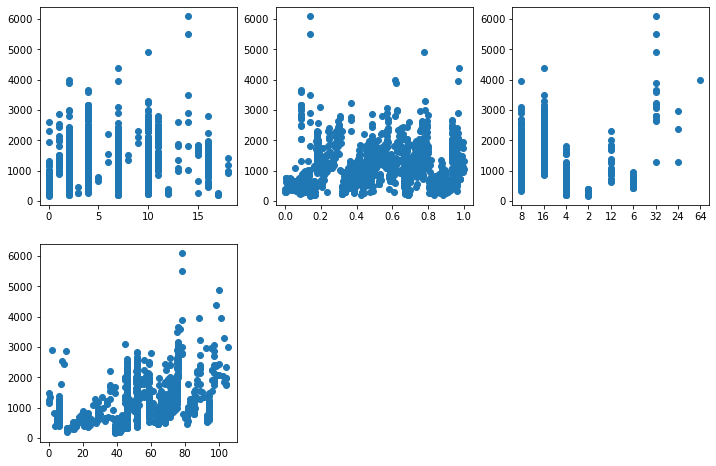

In [859]:
plt.figure(figsize=(12,8)) #

plt.subplot(2,3,1)
plt.scatter(x1['Company'],y1)

plt.subplot(2,3,2)
plt.scatter(x1['Product'],y1)

plt.subplot(2,3,3)
plt.scatter(x1['Ram'],y1)

plt.subplot(2,3,4)
plt.scatter(x1['Gpu'],y1)

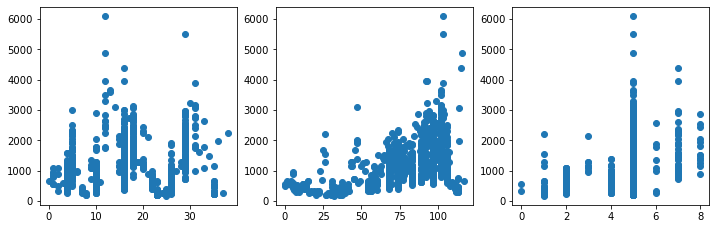

In [860]:
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.scatter(x1['Memory'],y1)

plt.subplot(2,3,2)
plt.scatter(x1['Cpu'],y1)

plt.subplot(2,3,3)
plt.scatter(x1['OpSys'],y1)

# 3d scatter with K-NN

Text(0.5, 0, 'Price')

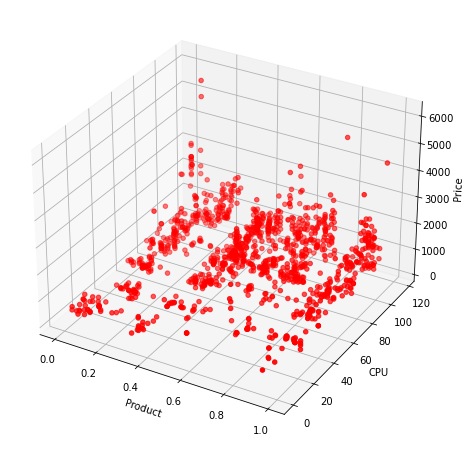

In [861]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111,projection="3d")

xd_Product=x1['Product']
xd_Cpu=x1['Cpu']

ax.scatter(xd_Product,xd_Cpu,y1,c="r",marker="o")

ax.set_xlabel("Product")
ax.set_ylabel("CPU")
ax.set_zlabel("Price")

# 3d scatter with Linear Regression 

Text(0.5, 0, 'Price')

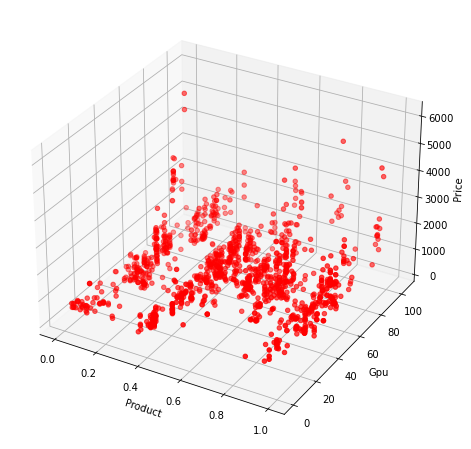

In [862]:
fig1=plt.figure(figsize=(12,8))
ax1=fig1.add_subplot(111,projection="3d")

xdl_Product=x['Product']
xdl_Cpu=x['Gpu']

ax1.scatter(xdl_Product,xdl_Cpu,y,c="r",marker="o")

ax1.set_xlabel("Product")
ax1.set_ylabel("Gpu")
ax1.set_zlabel("Price")

In [863]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Predicted Price,Predicted Price1,Predicted Price2
0,1,0.486224,4,13.3,23,65,8,4,56,8,1.37,1339.69,1544.270800,905.105455,1199.230
1,1,0.487844,4,13.3,1,63,8,2,50,8,1.34,898.94,1265.349244,697.446364,758.788
2,7,0.081037,3,15.6,8,74,8,16,52,4,1.86,575.00,897.726007,892.090000,869.800
3,1,0.486224,4,15.4,25,85,16,29,8,8,1.83,2537.45,2134.277523,1137.960000,1534.360
4,1,0.486224,4,13.3,23,67,8,16,57,8,1.37,1803.60,1619.567012,1390.513636,1354.430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0.940032,0,14.0,13,89,4,4,46,5,1.8,638.00,799.090127,1188.588182,717.200
1299,10,0.952998,0,13.3,19,89,16,29,46,5,1.3,1499.00,1995.239300,1943.727273,1649.200
1300,10,0.317666,3,14.0,0,34,2,35,39,5,1.5,229.00,450.810614,314.272727,278.800
1301,7,0.003241,3,15.6,0,89,6,10,20,5,2.19,764.00,666.814250,807.625455,887.394


In [864]:
df3=df

In [865]:
df3.drop('Predicted Price',axis='columns',inplace=True)
df3.drop('Predicted Price1',axis='columns',inplace=True)
df3.drop('Predicted Price2',axis='columns',inplace=True)

In [866]:
df3

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,0.486224,4,13.3,23,65,8,4,56,8,1.37,1339.69
1,1,0.487844,4,13.3,1,63,8,2,50,8,1.34,898.94
2,7,0.081037,3,15.6,8,74,8,16,52,4,1.86,575.00
3,1,0.486224,4,15.4,25,85,16,29,8,8,1.83,2537.45
4,1,0.486224,4,13.3,23,67,8,16,57,8,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0.940032,0,14.0,13,89,4,4,46,5,1.8,638.00
1299,10,0.952998,0,13.3,19,89,16,29,46,5,1.3,1499.00
1300,10,0.317666,3,14.0,0,34,2,35,39,5,1.5,229.00
1301,7,0.003241,3,15.6,0,89,6,10,20,5,2.19,764.00


In [867]:
import numpy as np
# xn=df3[['Company','Product','TypeName','Inches','ScreenResolution','Cpu','Ram','Memory','Gpu','OpSys',
#         'Weight']]
# yn=df3[['Price_euros']]

# xntrain,xntest,yntrain,yntest=train_test_split(xn,yn,train_size=.70,random_state=42)
# regn = LinearRegression()
# # c=regn.intercept_
# # c
# regn

LinearRegression()

# Resgression stat for Linear Regression

In [869]:
# xmd=np.array()
# xmd=xmd.T
# xmd=np.c_[xmd,np.ones(xmd.shape[0])]
# beta_hat=np.linalg.lstsq(xmd,y,rcond=None)[0]
# print(beta_hat)

# print("",reg.getCoefficients())
# c=regn.intercept_
# c

array([-110.2504951])

In [876]:
# coefficients=regn.coef_
# t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11

In [879]:
c1=reg.intercept_
c1

array([-110.2504951])

In [880]:
coefficients1=reg.coef_
coefficients1

array([[  9.26718311, 115.38118549,  42.24529441, -72.24239163,
         10.59613942,   3.70904019,  83.22733593,   5.31075419,
          4.14908147, 104.63416316, 101.98050338]])

# Results and Inference

In [ ]:
# for Super Regression problem of predicting Price in Euros we see accuracy of Linear Regression
# is .65 mse:184771.64 , mae=298.98 , when we do K-NN we have slight increase accuracy1:.65 mse1:134219.52,  
# mae1=257.46 but this is still underfit model so we do Hyper Performance tuning we get
# accuracy2=.70 mse2:122262.98,mae2=243.51 , this is acceptable model . We can choose to do 
# overfitting but since its dispersion is high not much accuracy will be gained moreover its a Regression Model so overfitting 
# may be a tradeoff with accuracy therefore K-NN with hyper performance tuning model is best. 